Demo MechincalAssembly class
------------------------------

The goal of this routine is to demostrate the new __MechanicalAssembly__ class implemented in AMfe. In order to so, we will solve a problem with multiple elastic bodies which are connected by bound constraints.
Different meshes will be importanted and modified by __translation__ and __rot_z__ methods which are implemented in the mesh Class.

The current capability of AMfe allow us to solve static and dynamic problem with a single mesh.

In [1]:
# importaint libraries 
import amfe
import matplotlib.pyplot as plt
import numpy as np

mesh_filename_1 = amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')

# importing mesh 1
m1 = amfe.Mesh()
m1.import_msh(mesh_filename_1)

fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_mesh(m1,ax1)
plt.show()

Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.



<Figure size 1600x400 with 1 Axes>

Solving the Standard FE problem
---------------------------

$$
Ku = f
$$

The physical IDs can be used to impose Dirichlet and Neumann boundary condition as well set a problem domain and material behavior.

In [2]:
# creating a mechanical component
my_comp = amfe.MechanicalSystem()

#creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# setting mesh object and selecting problem domain
my_comp.set_mesh_obj(m1)
domain = my_comp.set_domain(3,my_material)

# setting B.C.
value = 1e8
my_comp.apply_dirichlet_boundaries(1, 'xy')
my_comp.apply_neumann_boundaries(2, value, 'normal')

# solving linear static problem
s = amfe.LinearStaticsSolver(my_comp)
s.solve()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(my_comp, factor=scale, ax = ax1)
    plt.show()
    
interact(plot_static,scale=(0,500,50))  

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1102 elements and 2360 dofs.
Time taken for preallocation: 0.02 seconds.
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\sparse\sputils.py:115: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


interactive(children=(IntSlider(value=1, description='scale', max=500, step=50), Output()), _dom_classes=('wid…

<function __main__.plot_static(scale=1)>

In [4]:
my_comp.mesh_class.el_df

,idx_gmsh,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,5,6,7,8
0,1,point,2,5,19,0,NaN,None,4,NaN,NaN,NaN
1,2,point,2,4,20,0,NaN,None,5,NaN,NaN,NaN
2,3,straight_line,4,1,13,1,3.0,None,1,42.0,NaN,NaN
3,4,straight_line,4,1,13,1,3.0,None,42,43.0,NaN,NaN
4,5,straight_line,4,1,13,1,3.0,None,43,44.0,NaN,NaN
5,6,straight_line,4,1,13,1,3.0,None,44,45.0,NaN,NaN
6,7,straight_line,4,1,13,1,3.0,None,45,46.0,NaN,NaN
7,8,straight_line,4,1,13,1,3.0,None,46,47.0,NaN,NaN
8,9,straight_line,4,1,13,1,3.0,None,47,48.0,NaN,NaN
9,10,straight_line,4,1,13,1,3.0,None,48,49.0,NaN,NaN


Extract interface node from sub_3 and sub_2
Extract interface node from sub_2 and sub_1
Interface nodes from sub_2 and sub_3 already extracted
Interface nodes from sub_1 and sub_2 already extracted


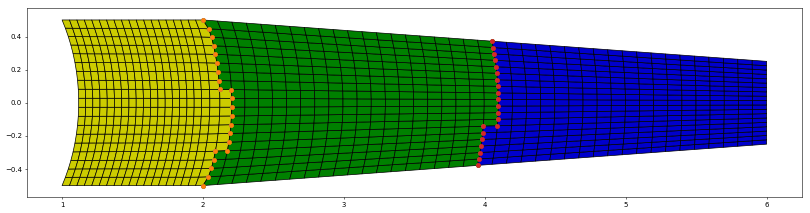

In [3]:
domain.split_in_partitions()

fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_domain(domain,ax1)
plt.show()

In [4]:
super_domain = amfe.SuperDomain(domain.groups)

B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()

BTGT = B.T.dot(G.T)
GB = G.dot(B)

n_dof = super_domain.total_displacement_dofs
n_int = super_domain.total_lambda_dofs
n_null = super_domain.total_alpha_dofs

block_zero_1 = np.zeros([n_null,n_int+n_null])
block_zero_2 = np.zeros([n_int,n_int+n_null])

zero_vector = np.zeros(n_int+n_null)

A1 = np.hstack((Kd,BTGT,B.T))
A2 = np.hstack((GB,block_zero_1))
A3 = np.hstack((B,block_zero_2))


A = np.vstack((A1,A2,A3))
b = np.concatenate((fd,zero_vector))

x = np.linalg.solve(A,b)

u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]

u = super_domain.eval_subdomain_displacement(lambda_dual, alpha_dual)

def plot_static(scale=0):
    fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_superdomain(super_domain, scale, ax1)
    plt.show()

interact(plot_static,scale=(0,500,50)) 

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 367 elements and 814 dofs.
Time taken for preallocation: 0.00 seconds.


NameError: name 'amna' is not defined

Solving Equilibrium with Dual Interface Assembly Problem
----------------------------------------------

The Dual Assembly system of equation discribe above can be broken in two equations.

\begin{equation}
Ku + B^{T}\lambda  = f \\
Bu = 0 
\end{equation}

Then, the solution u can be calculate by:

\begin{equation}
u =  K^*(f- B^{T}\lambda) +  R\alpha \\
\end{equation}

Where $K^*$ is the generelize pseudo inverse and $R$ is $Null(K) = \{r \in R: Kr=0\}$, named the kernel of the K matrix.
In order to the solve $u$ the summation of all forces in the subdomain, interface, internal and extenal forces must be in the image of K. This implies the $(B^{T}\lambda  + f)$ must be orthonal to the null space of K.

\begin{equation}
R^{T}(f - B^{T}\lambda  ) = 0 \\
\end{equation}

Phisically, the equation above eforces the self-equilibrim for each subdomain. Using the compatibility equation and the self-equilibrium equation, we can write the dual interface equilibrium equation as:


$$
\begin{bmatrix} F & G^{T} \\
                 G & 0  
\end{bmatrix}
\begin{bmatrix} \lambda  \\ 
\alpha
\end{bmatrix}
=
\begin{bmatrix} d \\ 
e \end{bmatrix}
$$

Where $F = BK^{*}B^{T}$, $G = -R^TB^T$, $d = BK^*f$ and $e =- R^Tf $.

In [ ]:
G, e = super_domain.assemble_global_G_and_e()
F, d = super_domain.assemble_F_and_d()

n_null = len(e) # null space size
n_int = len(d) # interface size
Zeros = np.zeros([n_null ,n_null])

A1 = np.hstack((F,G.T))
A2 = np.hstack((G,Zeros))

A = np.vstack((A1,A2))
b = np.concatenate((d,e))

# Dual interface problem
x = np.linalg.solve(A,b)
global_lambda = x[:n_int]
global_alpha = x[n_int:]

u = super_domain.eval_subdomain_displacement(global_lambda,global_alpha)

def plot_static(scale=0):
    fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_superdomain(super_domain, scale, ax1)
        
    plt.show()


interact(plot_static,scale=(0,500,50)) 

import IPython.display as ipd
ipd.Audio(filename="Vinheta - Brasil.mp3", autoplay=False)

The Mechanical Assembly Module
--------------------------------

Now let's say, we would like to import multiples meshes and impose rigid connection among them.

![title](blade_bases_mesh_1.png)
![title](blade_bases_mesh_2.png)


In [ ]:
# mesh files to be imported
msh_dict = {}
msh_dict[1] =  amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/ring_connection.msh')
msh_dict[3] = amfe.amfe_dir('meshes/test_meshes/ring_free.msh')

# id of physical domain
domain_id = {}
domain_id[1] = 3
domain_id[2] = 6
domain_id[3] = 6

# importing mesh 1
m1 = amfe.Mesh()
m1.import_msh(msh_dict[1])

# importing mesh 2
m2 = amfe.Mesh()
m2.import_msh(msh_dict[2])

# importing mesh 3
m3 = amfe.Mesh()
m3.import_msh(msh_dict[3])

# creating new mesh with a rotation of imported mesh
m4 = m3.rot_z(-86.55)

fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 200, facecolor='w', edgecolor='k')
amfe.plot_mesh(m1,ax1,False)
amfe.plot_mesh(m2,ax1,False)
amfe.plot_mesh(m3,ax1,False)
amfe.plot_mesh(m4,ax1,False)
plt.show()

In [ ]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# append domains to MechanicalAssembly
my_system = amfe.MechanicalAssembly()

submesh1 = m1.set_domain('phys_group',domain_id[1])
submesh2 = m2.set_domain('phys_group',domain_id[2])
submesh3 = m3.set_domain('phys_group',domain_id[3])
submesh4 = m4.set_domain('phys_group',domain_id[3])

my_system.append_domain(submesh1, my_material, 1)
my_system.append_domain(submesh2, my_material, 2)
my_system.append_domain(submesh3, my_material, 3)
my_system.append_domain(submesh4, my_material, 4)
my_system.update_global_system()

# replacing phys tags to avoid conflict
my_system.change_domain_physical_tag(1,2,8)
my_system.change_domain_physical_tag(1,1,9)
my_system.change_domain_physical_tag(1,3,6)
my_system.change_domain_physical_tag(1,3,6)
my_system.update_global_system()

# select submesh for interfaces
tol=5.0e-4
sub_int1 = my_system.get_submesh(2,3)
sub_int2 = my_system.get_submesh(3,4)
my_system.add_bonded_interface_constraint(sub_int1,sub_int2,tol)

sub_int3 = my_system.get_submesh(1,9)
sub_int4 = my_system.get_submesh(2,2)
my_system.add_bonded_interface_constraint(sub_int3,sub_int4,tol)

sub_int5 = my_system.get_submesh(2,4)
sub_int6 = my_system.get_submesh(4,3)
my_system.add_bonded_interface_constraint(sub_int5,sub_int6,tol)
    

# replacing phys tags to avoid conflict
my_system.change_domain_physical_tag(3,3,10)
my_system.change_domain_physical_tag(3,4,7)
my_system.change_domain_physical_tag(4,3,7)
my_system.change_domain_physical_tag(4,4,11)
my_system.update_global_system()    
    
new_mesh = my_system.get_global_mesh()

fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 200, facecolor='w', edgecolor='k')
amfe.plot_mesh(new_mesh,ax1)
plt.show()

The Global Mechanical Assembly
--------------------------------

Let us now create a new mechanical based on the previous assembled mechanical component.

In [ ]:
global_system = amfe.MechanicalAssembly()
mesh_list = []
submesh_list = []
angle_list = [90,210,330]
global_domain_id = 6

#fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
for i, angle in enumerate(angle_list):
    new_mesh_i = new_mesh.rot_z(angle)
    submesh_i = new_mesh_i.set_domain('phys_group', global_domain_id)
    mesh_list.append(new_mesh_i)
    submesh_list.append(submesh_i)
    #amfe.plot_mesh(new_mesh_i,ax1,False)
    global_system.append_domain(submesh_i, my_material, i+1)
    
#plt.show()
global_system.update_global_system()
new_mesh = global_system.get_global_mesh()
fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
amfe.plot_mesh(new_mesh,ax1)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()

One can use the __add_bonded_interface_constraint__ method again to impose a constraint in the interfaces and then solve the Primal Assemble problem as defined as:

$$
L^{T}K_{B}Lu_{G} = L^{T}f_{B}
$$

Where $K_{B}$ is a block diagonal matrix of local $K_{s}$,  and $f_{B}$ is the vector concatenation of local vector forces as d $f_{s}$.

One can define the Primal Assembly stiffness and force as:

$$
K_{G} = L^{T}K_{B}L
$$

$$
f_{G} = L^{T}f_{B}
$$

Then, the static problem can be written as:

$$
K_{G}u_{G} = f_{G}
$$

_* The L operator is never build in the MechanicalAssembly class, instead the duplicated nodes in the interface are remove in order to have a single set of DoFs_

In [ ]:
# select submesh for interfaces
sub_int1 = global_system.get_submesh(1,10)
sub_int2 = global_system.get_submesh(2,11)
global_system.add_bonded_interface_constraint(sub_int1,sub_int2,tol)

sub_int3 = global_system.get_submesh(2,10)
sub_int4 = global_system.get_submesh(3,11)
global_system.add_bonded_interface_constraint(sub_int3,sub_int4,tol)

sub_int5 = global_system.get_submesh(3,10)
sub_int6 = global_system.get_submesh(1,11)
global_system.add_bonded_interface_constraint(sub_int5,sub_int6,tol)
    
new_mesh = global_system.get_global_mesh()

my_global_comp = amfe.MechanicalSystem()
my_global_comp.set_mesh_obj(new_mesh)
global_domain = my_global_comp.set_domain(6,my_material)
my_global_comp.apply_dirichlet_boundaries(1, 'xy')
my_global_comp.apply_neumann_boundaries(8, value, 'normal')
s1 = amfe.LinearStaticsSolver(my_global_comp)
s1.solve()

def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(15, 15), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(my_global_comp, factor=scale, ax = ax1)
    plt.xlim([-7,7])
    plt.ylim([-7,7])
    plt.show()
    
interact(plot_static,scale=(0,500,50))  

In [ ]:
global_domain.split_in_partitions()

fig, ax1=plt.subplots(1,figsize=(15, 15), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_domain(global_domain,ax1)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()

Solving Equilibrium with The Projected Dual Interface Problem with PCGP 
-------------------------------------------------------------------------

The two equation that must be solved in Dual interface problem are:

\begin{equation}
F\lambda + G^{T}\alpha  = d \\
G\lambda = e 
\end{equation}


Let's define the Projector operator $P_G$ which project any vector $\lambda$ in to the $Ker(G)$:

\begin{equation}
P_G = I - Q_G = I - G^T(GG^T)^{-1}G
\end{equation}

Where $ P_G(\lambda) = \{ \lambda_{kernel} = P_G\lambda : \lambda_{kernel} \in Ker(G) \}$.
We also define $ Q_G(\lambda) = \{ \lambda_{image} = Q_G\lambda : \lambda_{image} \in Im(G^T) \}$
Since $Ker(G)$ is orthogonal to $Im(G^T)$, we can multiple $P_G$ in the fisrt equation and multiple by $Q_G$ the second one:

\begin{equation}
P_G(F\lambda + G^{T}\alpha) = P_GF\lambda = P_Gd \\
Q_GG{\lambda} = Q_Ge \\
{\lambda_{image}} = G^T(GG^T)^{-1}e \\
\lambda = \lambda_{kernel} + \lambda_{image}
\end{equation}

Then the equation for $\lambda_{kernel}$ is:

\begin{equation}
P_GF\lambda_{kernel} = P_G(d - F\lambda_{image}) =  P_G\hat{d} \\
\end{equation}

And  $\alpha$ can be solve by:

\begin{equation}
GG^{T}\alpha = G(d - F\lambda) 
\end{equation}

The equation for  $\lambda_{kernel}$ can be solved iterativaly using a PCGP algorithm as it follows:

1. Initialize with $r^0 = \hat{d},  \lambda_{ker}^{0} = \tilde{0}, \beta^1 = 0 $

2. Irerate $k = 1,2..,n$ until $ \lVert w^k \rVert > tol $  
    Project residual $w^{k-1} = P_Gr^{k-1}$  
    Precondition $z^{k-1} = \bar{F^{-1}}w^{k-1}$  
    Project  $y^{k-1} = P_Gz^{k-1}$   
    $\beta^{k} = (y^{k-1})^Tw^{k-1}/(y^{k-2})^Tw^{k-2}$  
    $p^{k} = y^{k-1} + \beta^{k}p^{k-1}  $  
    $\alpha^{k} = (y^{k-1})^Tw^{k-1}/(p^{k})^TFp^{k}$  
    $\lambda_{ker}^{k} = \lambda_{ker}^{k-1} + \alpha^{k}p^{k}$  
    $r^{k} = r^{k-1} + \alpha^{k}Fp^{k}$  

3. Set solution $\lambda_{ker} = \lambda_{ker}^{k} $  


In [ ]:
import os
varibles_path = r'H:\TUM-PC\Dokumente\Projects\FETI'


global_super_domain = amfe.load_obj(os.path.join(varibles_path,'global_super_domain.pkl'))
#global_super_domain = amfe.load_object()
#G, e = global_super_domain.assemble_global_G_and_e()
#F, d = global_super_domain.assemble_F_and_d()
#n_int = global_super_domain.total_lambda_dofs

#B = global_super_domain.assemble_global_B()
#Sd = global_super_domain.assemble_block_primal_schur_complement('schur')
#Sl =global_super_domain.assemble_block_primal_schur_complement('lumped')
#Ssl = global_super_domain.assemble_block_primal_schur_complement('superlumped')
#Sls = global_super_domain.assemble_block_primal_schur_complement('lumpedschur')


F = amfe.load_obj(os.path.join(varibles_path,'F.pkl'))
G = amfe.load_obj(os.path.join(varibles_path,'G.pkl'))
d = amfe.load_obj(os.path.join(varibles_path,'d.pkl'))
e = amfe.load_obj(os.path.join(varibles_path,'e.pkl') )                    
n_int,l = F.shape

B = amfe.load_obj(os.path.join(varibles_path,'B.pkl'))
Sd = amfe.load_obj(os.path.join(varibles_path,'Sd.pkl'))
Sl =amfe.load_obj(os.path.join(varibles_path,'Sl.pkl'))
Ssl = amfe.load_obj(os.path.join(varibles_path,'Ssl.pkl'))
Sls = amfe.load_obj(os.path.join(varibles_path,'Sls.pkl'))


Fd = lambda x : B.dot(Sd).dot(B.T).dot(x)
Fl = lambda x : B.dot(Sl).dot(B.T).dot(x)
Fsl = lambda x : B.dot(Ssl).dot(B.T).dot(x)
Fls = lambda x :B.dot(Sls).dot(B.T).dot(x)
FI = lambda x : x



# defining FETI operators
GGT = G.dot(G.T)
GGT_inv_action = lambda r : np.linalg.solve(GGT,r)
F_action = lambda x : F.dot(x)
Qg_action = lambda x : G.T.dot(GGT_inv_action(G.dot(x)))
Proj_action = lambda w : w - Qg_action(w)
                          

                          

In [ ]:
# Solving lamda im
lambda_im = G.T.dot(GGT_inv_action(e))                          

# primal gap                          
r0 = d - F_action(lambda_im)

res_list = []
prec_list = [Fd,Fl,Fsl,Fls,FI]
# PCGP algorithm
for prec_action in prec_list:
    lambda_ker, last_res, proj_r_hist, lambda_hist = amfe.PCGP(F_action,r0,Proj_action,Precondicioner_action=prec_action)
    res_list.append(proj_r_hist)
    

lambda_sol =  lambda_im + lambda_ker

dtil = d - F_action(lambda_sol)
alpha_pgc = np.linalg.solve(GGT,G.dot(dtil))
                                              
amfe.save_object(res_list,'rest_list.pkl')        
amfe.save_object(lambda_sol,'lambda_sol.pkl')        

In [ ]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(res_list[4],'^--',label="Identity")    
plt.plot(res_list[0],'x:',label="Dirichlet")    
plt.plot(res_list[1],'o-.',label="Lumped")    
plt.plot(res_list[2],'*--',label="Super Lumped")    
plt.plot(res_list[3],'D--',label="Lumped Schur")    


plt.xlabel('iteration')
plt.ylabel('Projected error $||w^k||$')
plt.title('PCGP with different precondicioning.')
plt.yscale("log", nonposy='clip')
plt.legend(loc='upper right')
plt.show()

In [ ]:
u = global_super_domain.eval_subdomain_displacement(lambda_sol,alpha_pgc)    


def plot_static(scale=0):
    fig, ax1=plt.subplots(1,figsize=(15, 15), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_superdomain(global_super_domain, scale, ax1)
    plt.xlim([-7,7])
    plt.ylim([-7,7])
    plt.show()


interact(plot_static,scale=(0,500,50)) 


In [ ]:
amfe.FetiSolver.linear_static (my_global_comp)